<a href="https://colab.research.google.com/github/ariadnecs/imersao-dados-alura/blob/main/Aula3_ImersaoDados3_ACS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

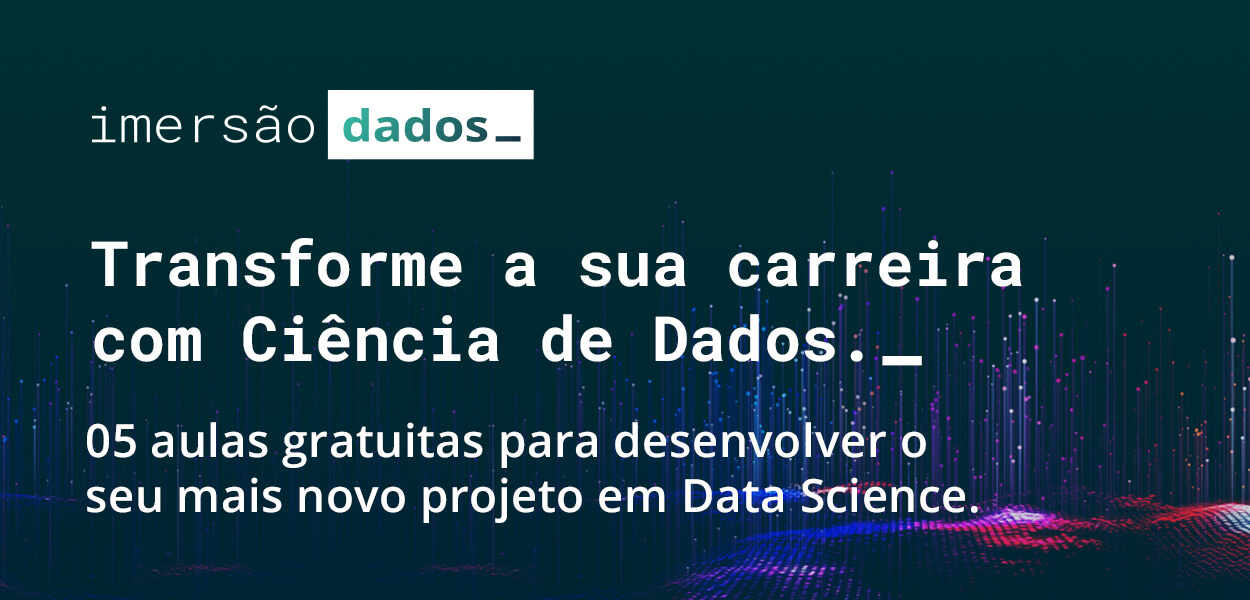

## Imersão Dados - Alura




Olá Rede!

*Esta imersão tem como escopo dados do ramo de Drug Discovery disponibilizados pelo [Laboratory innovation science at Harvard](https://lish.harvard.edu/) em uma competição no kaggle. Durante as aulas aprendemos a importar, explorar, analisar dados com a biblioteca pandas do python. Avaliamos fatores que nos ofereceram insights sobre os dados através de uma abordagem estatística. Utilizamos também as bibliotecas numpy, matplotlib e seaborn para plotar gráficos e assim, analisar dados de uma forma mais abrangente. Durante as aulas foram elaborados desafios que instigaram a investigar e explorar os dados e recursos da linguagem com o propósito de transcender o óbvio e incitar o espírito investigativo. Durante toda a imersão contamos com o auxílio de uma equipe no discord composta pelos alunos, instrutores, monitores e professores da Alura.*

*  Aula 1: Análise de dados, python, pandas e novos fármacos
*  Aula 2: Estatísticas, visualização de dados e distribuições 
*  Aula 3: Correlações, causalidade e relações entre genes 
*  Aula 4: Merge e análise de resultados 
*  Aula 5: Machine learning e sci-kit learning  




## Aula 3: Correlações, causalidade e relações entre genes

Nesta aula iremos cruzar os dados da DataFrame para realizar análises e verificar as relações entre as colunas que a compõem. 
Aprenderemos a utlizar o gráfico de dispersão e de calor para verificar os dados sobre os genes, as culturas celulares, e as possíveis correlações existentes. 
Abordaremos os conceitos de correlação e causalidade e assim ter embassamento para adquirir isights sobre os dados.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


url_dados= 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')



dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [ ]:
# renomear coluna 'drogas' para 'composto'
mapa = {'droga' : 'composto'}
dados.rename(columns = mapa, inplace = True)
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


#### 3.1 Verificar as proporções entre os tratamentos - criando uma tabela de frequência

Experimento com variáveis independentes, dados categóricos: tratamento, tempo, dose, composto

Efeitos, variáveis dependentes: nos genes e culturas de células

[Tabela de Frequência - pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=frequency%20table)

Os valores acima correspondem a todos os tratamentos (contole e composto)

In [ ]:
# linhas: dose + tempo; coluna: tratamento
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Agora podemos observar quais resultados são equivalentes aos tratamentos controle e droga(composto)

#### 3.2 Construindo a tabela de frequência com as proporçoes dos experimentos

In [ ]:
# somatório de todas as células = 1, proporção de cada célula em toda a matriz
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [ ]:
# somatório dos índices, em cada linha, = 1, D1 - 24, D1 - 48, D1 - 72... 
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

#### 3.3 Verificando o efeito do composto na expressão do gene 0.


In [ ]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

São estes valores que devemos observar: 

(mean) Média 'g-0' = 0.248366

(std) Desvio Padão 'g-0' = 1.393399
* Desvio padrão + (2 x média) = 3.035164
* Desvio padrão + média =  1.642865
* Média 'g-0' = 0.248366
* Desvio padrão - média = -1.145033
* Desvio padrão - (2 x média) = -2.538432

95% dos valores estão entre -1.145033(Desvio padrão - média) e 1.642865(Desvio padrão + média)

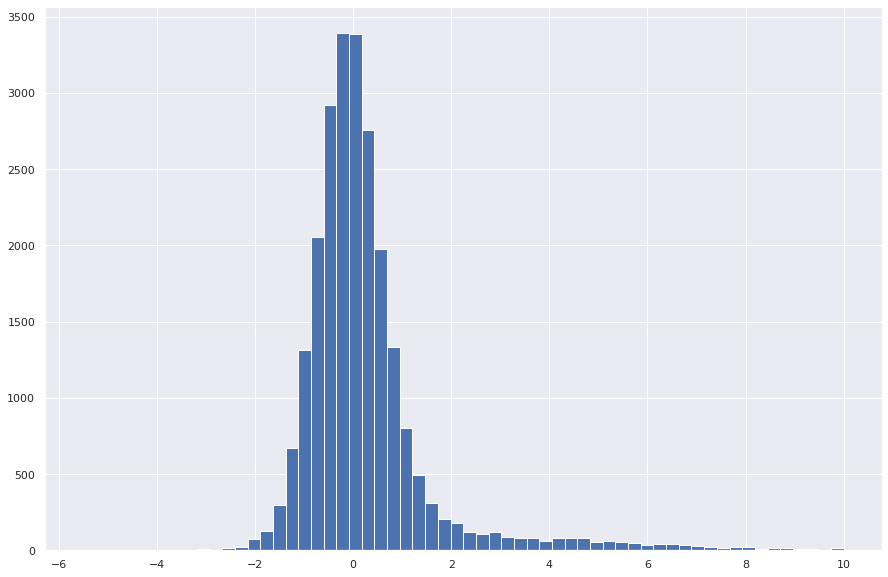

In [ ]:
plt.figure(figsize = (15, 10))
dados['g-0'].hist(bins = 60)

In [ ]:
# verificando um gene específico, médias de 'g-0'
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
# desvio padrão
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values = dados['g-0'], aggfunc = 'std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

####3.4 Como analisar resultados entre os genes 

Gráfico de Dispersão

[scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [ ]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


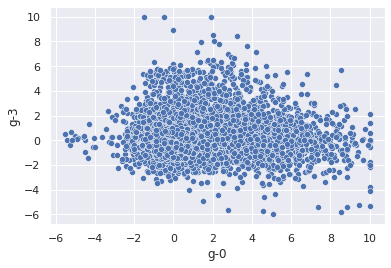

In [ ]:
# Há 23814 pontos marcados no gráfico!
sns.scatterplot(x = 'g-0', y = 'g-3', data = dados)

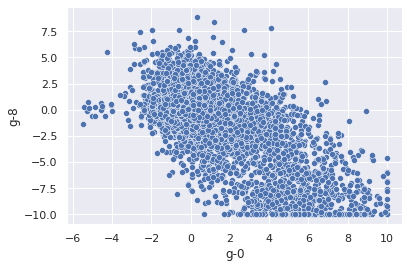

In [ ]:
# quanto maiores os valores de 'g-8' menores os valores de 'g-0', é uma relação inversamente proporcional
sns.scatterplot(x = 'g-0', y ='g-8', data = dados)

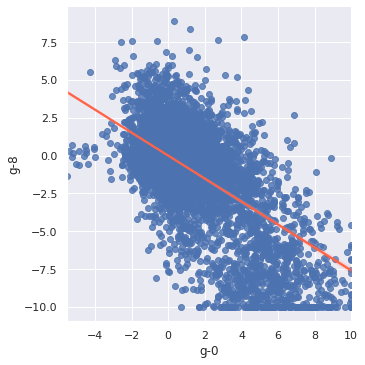

In [ ]:
# para plotar uma linha: lmplot
sns.lmplot(x = 'g-0', y ='g-8', data = dados, line_kws = {'color': 'tomato'})

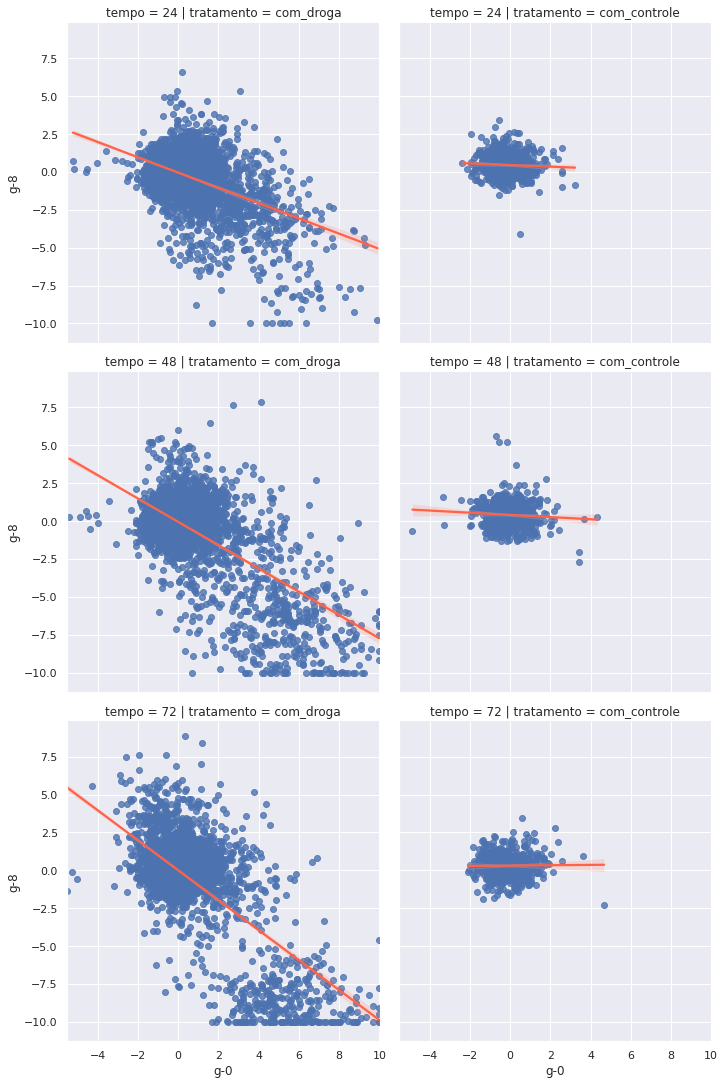

In [ ]:
sns.lmplot(x = 'g-0', y ='g-8', data = dados, line_kws = {'color': 'tomato'}, col = 'tratamento', row = 'tempo')

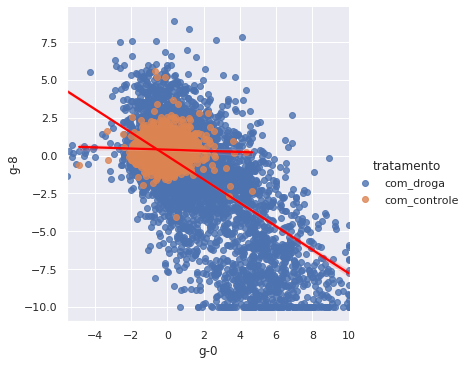

In [ ]:
# solução da Clarisse Alvarenga

sns.lmplot(data=dados, x='g-0', y='g-8', hue='tratamento', line_kws={'color':'red'})

É possível observar que as amostras submetidas ao tratamento com composto apresentam uma reta mais inclinada quanto maior for o tempo (72h). Maior foi o efeito do composto no g-8. O controle está instável.

####3.5 Calculando as correlações entre as variáveis

In [ ]:
# correlação de todas as linhas ':' com as colunas 'g-0' a 'g-771'
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

* Valores próximos de -1 ou 1 indicam alta correlação entre as variáveis
* Valores próximos de 0 indicam que as variáveis analisadas não são correlacionadas
* Resultados próximos de -1 indicam correlação inversamente proporcionais e próximos de 1 são diretamente proporcionais

[Mapa de Calor - Seaborn](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

[Color Palettes - Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

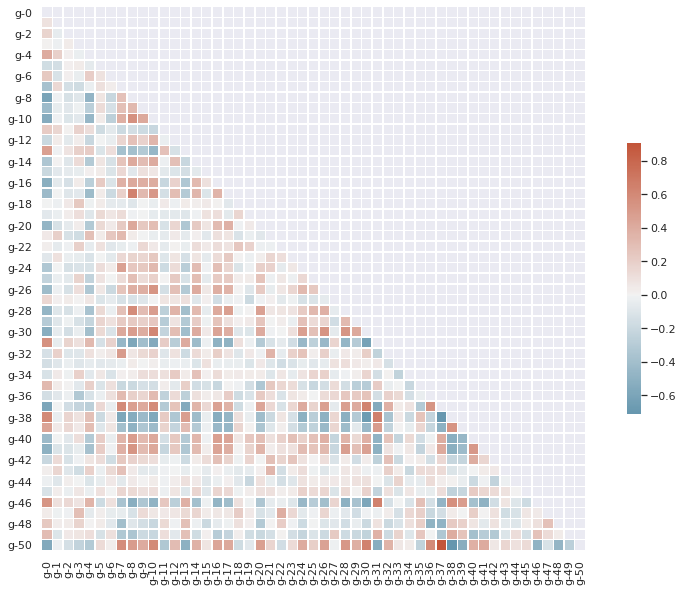

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = dados.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

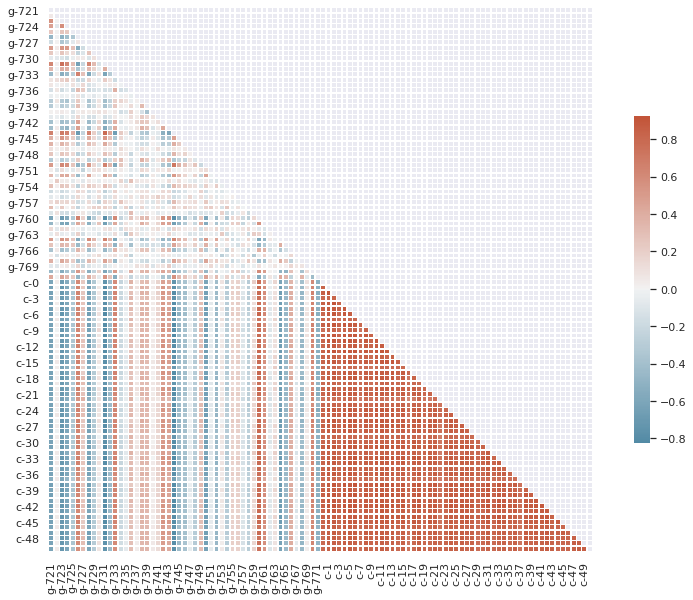

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = dados.loc[:, 'g-721':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})

Resultados que mostram variáveis altamente correlacionadas indicam algo a ser investigado, dão uma pista...

In [ ]:
# correlacionando culturas de células
corr_celular = dados.loc[:, 'c-50':'c-99'].corr()
corr_celular

,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
c-50,1.000000,0.842470,0.849415,0.781816,0.847650,0.842996,0.777557,0.871928,0.744213,0.807852,0.818278,0.777806,0.846556,0.847508,0.817107,0.799568,0.844215,0.842011,0.801200,0.780715,0.786518,0.800421,0.830806,0.826401,0.707127,0.831468,0.808185,0.822120,0.796280,0.832559,0.816488,0.878352,0.829702,0.806101,0.867759,0.816046,0.836364,0.772904,0.808831,0.783120,0.822574,0.817779,0.842908,0.798091,0.847605,0.801341,0.827935,0.838963,0.790022,0.772689
c-51,0.842470,1.000000,0.898339,0.858756,0.892608,0.880704,0.824281,0.877916,0.774611,0.870111,0.871056,0.856594,0.875699,0.874134,0.847403,0.856382,0.892076,0.859066,0.864461,0.823407,0.846661,0.864048,0.880003,0.893869,0.733124,0.884792,0.835964,0.837777,0.860441,0.853519,0.886085,0.884623,0.900705,0.870913,0.876635,0.895302,0.834831,0.820686,0.838706,0.838015,0.889531,0.886217,0.849359,0.869220,0.893671,0.844414,0.878595,0.873827,0.828771,0.824432
c-52,0.849415,0.898339,1.000000,0.845736,0.892722,0.899908,0.798067,0.884027,0.774972,0.874691,0.883315,0.844018,0.903559,0.891816,0.844496,0.865604,0.904704,0.875115,0.855431,0.828407,0.859150,0.853169,0.881867,0.880502,0.744056,0.894957,0.866686,0.863380,0.855896,0.846656,0.862369,0.903354,0.895962,0.892980,0.878013,0.895606,0.827522,0.801147,0.843341,0.839310,0.904919,0.888016,0.877061,0.872864,0.894380,0.826976,0.898668,0.886898,0.828686,0.792786
c-53,0.781816,0.858756,0.845736,1.000000,0.851620,0.841344,0.820455,0.821505,0.762402,0.832127,0.839818,0.851566,0.844174,0.812375,0.800564,0.816863,0.841598,0.818911,0.855308,0.819156,0.825117,0.837526,0.861340,0.849976,0.711646,0.851353,0.773114,0.816483,0.864468,0.800027,0.849029,0.816876,0.847682,0.859431,0.828572,0.878198,0.805665,0.817148,0.844594,0.839715,0.856873,0.852564,0.799277,0.856121,0.847351,0.802019,0.850631,0.842217,0.794339,0.787333
c-54,0.847650,0.892608,0.892722,0.851620,1.000000,0.891262,0.818597,0.876697,0.786866,0.859563,0.873961,0.843136,0.880517,0.882656,0.840924,0.853465,0.891012,0.866727,0.852462,0.832407,0.843352,0.859686,0.875847,0.898580,0.734557,0.878940,0.831032,0.853387,0.864491,0.855201,0.866611,0.885038,0.892578,0.874346,0.883515,0.881674,0.843239,0.807769,0.846417,0.837183,0.889137,0.881203,0.864713,0.869755,0.890543,0.842491,0.886412,0.868791,0.834585,0.813363
c-55,0.842996,0.880704,0.899908,0.841344,0.891262,1.000000,0.800541,0.869826,0.767600,0.861351,0.886045,0.833711,0.895995,0.891555,0.837680,0.845618,0.880209,0.894535,0.833882,0.817708,0.851063,0.838121,0.874213,0.875227,0.725248,0.887904,0.827688,0.849797,0.857741,0.837481,0.847946,0.894636,0.883645,0.880867,0.899801,0.877950,0.819702,0.794787,0.848948,0.826634,0.910217,0.863932,0.883307,0.873325,0.906384,0.821604,0.893962,0.872178,0.808354,0.790108
c-56,0.777557,0.824281,0.798067,0.820455,0.818597,0.800541,1.000000,0.803113,0.730845,0.783653,0.784817,0.816702,0.807183,0.769167,0.803095,0.775931,0.813681,0.788967,0.796187,0.775120,0.758036,0.811862,0.793838,0.822292,0.686297,0.814610,0.734614,0.778368,0.798948,0.783569,0.813379,0.794211,0.804519,0.807185,0.816772,0.820479,0.786111,0.806601,0.809932,0.798025,0.804260,0.795785,0.776730,0.801781,0.813091,0.787302,0.805047,0.796951,0.774311,0.780479
c-57,0.871928,0.877916,0.884027,0.821505,0.876697,0.869826,0.803113,1.000000,0.771675,0.853070,0.862986,0.810843,0.872029,0.870469,0.851552,0.849286,0.880419,0.865127,0.833262,0.817311,0.835048,0.830605,0.867760,0.877983,0.723969,0.872700,0.828785,0.848857,0.828929,0.857804,0.860548,0.895999,0.869011,0.853650,0.886410,0.856378,0.849747,0.796204,0.829314,0.821760,0.867085,0.846999,0.870229,0.850826,0.889200,0.829751,0.865695,0.860347,0.832687,0.808799
c-58,0.744213,0.774611,0.774972,0.762402,0.786866,0.767600,0.730845,0.771675,1.000000,0.759888,0.765257,0.745

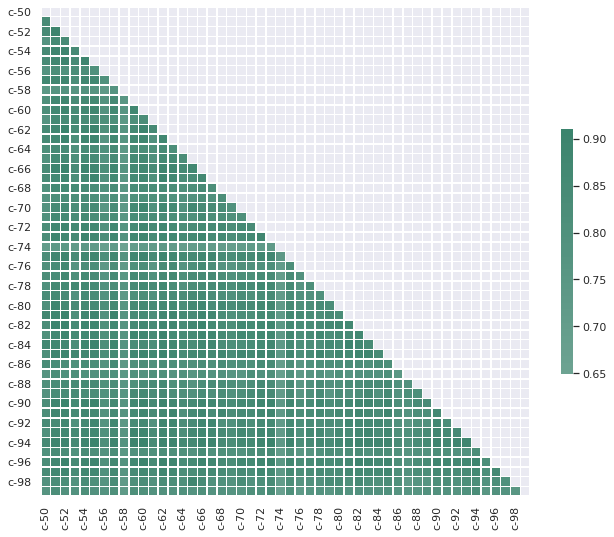

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 160, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Os valores rferentes aos cultivos celulares indicam as viabilidades das células, o quanto elas sobreviveram

As culturas de células apresentaram resultados altamente correlacionados.

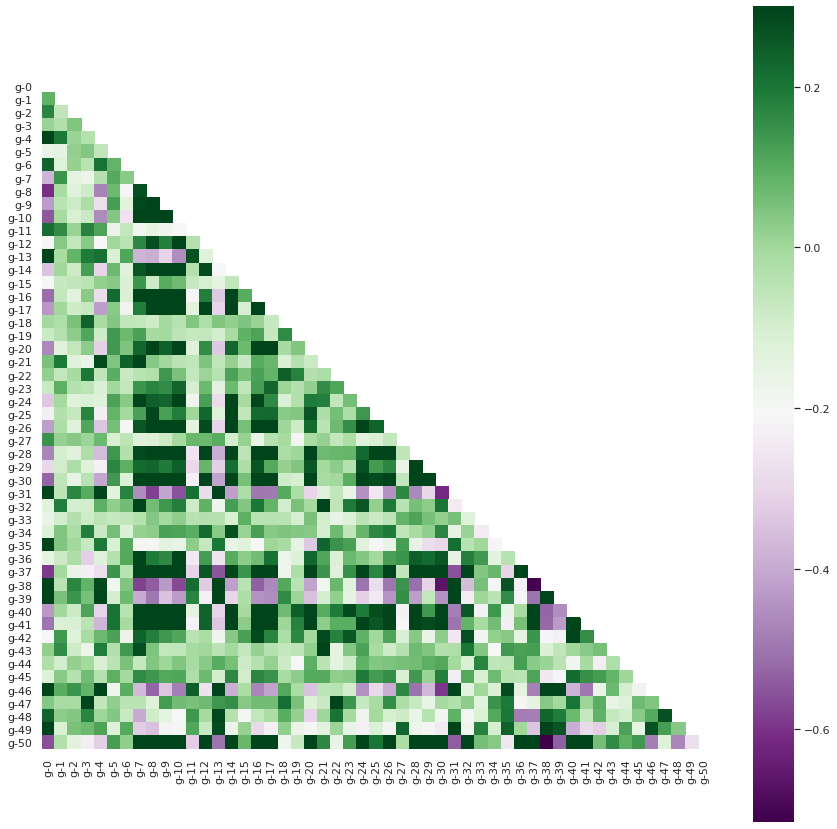

In [ ]:
corr = dados.loc[:, 'g-0':'g-50'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap ='PRGn')

#### 3. Desafios

#####Desafio 01: Criar tabelas de frequência com pandas.groupby

In [ ]:
dados.groupby('dose').mean()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
dose,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D1,48.041492,0.312476,-0.176353,0.250972,0.062657,0.108247,0.025262,0.076585,-0.237064,-0.226690,0.150789,-0.201201,0.110403,0.114342,0.241768,-0.158312,-0.035744,0.077520,-0.165012,0.036472,-0.161725,-0.109985,-0.021216,0.055076,-0.179967,-0.050235,-0.037881,-0.096205,0.121972,-0.047422,-0.031125,-0.157107,0.318261,-0.290574,0.114143,-0.147350,0.131518,-0.154220,-0.683118,0.592475,...,-0.584252,-0.390375,-0.496457,-0.690592,-0.470387,-0.699810,-0.521672,-0.568290,-0.461397,-0.326255,-0.609233,-0.405284,-0.489875,-0.520846,-0.047944,-0.532654,-0.295622,-0.556140,-0.459241,-0.511585,-0.537601,-0.563628,-0.544859,-0.493663,-0.512003,-0.467815,-0.399602,-0.332572,-0.363831,-0.448172,-0.511660,-0.512754,-0.595254,-0.561162,-0.567814,-0.393839,-0.516180,-0.418721,-0.527623,-0.337724
D2,47.997943,0.181619,-0.011696,0.049474,0.102081,0.004353,-0.309684,-0.006335,-0.166823,-0.151971,0.087750,-0.042236,0.257170,0.173252,0.175705,-0.190096,-0.012654,0.178154,-0.127558,0.141010,-0.000999,-0.113910,-0.156265,0.039710,-0.052409,-0.178779,-0.068223,-0.085694,0.101977,-0.045454,-0.123208,-0.239961,0.448723,-0.084129,0.041985,-0.037052,0.140113,-0.224427,-0.527158,0.473986,...,-0.447793,-0.329947,-0.372549,-0.533423,-0.330968,-0.536258,-0.380002,-0.423111,-0.364318,-0.225779,-0.483931,-0.310017,-0.394004,-0.427663,0.028681,-0.398648,-0.257537,-0.351429,-0.364690,-0.398952,-0.404749,-0.444941,-0.438466,-0.398082,-0.412040,-0.348397,-0.263911,-0.255900,-0.291394,-0.353142,-0.425082,-0.407955,-0.427885,-0.436612,-0.443874,-0.311962,-0.408623,-0.336096,-0.410521,-0.263796


In [ ]:
dados.groupby('tempo').mean()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
tempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24,0.213521,-0.143037,0.372092,0.129006,0.010646,-0.029011,0.067469,-0.219679,-0.112792,0.153125,-0.088487,0.112532,0.230633,0.215123,-0.102497,-0.044242,0.134849,-0.100420,0.048810,-0.099630,-0.104054,-0.122793,0.040165,-0.062644,-0.005310,-0.016595,-0.029069,0.058407,-0.058084,-0.057177,-0.102559,0.267677,-0.154206,-0.029249,0.032419,0.107350,-0.337844,-0.615530,0.375485,0.097073,...,-0.375172,-0.218044,-0.273350,-0.418676,-0.193068,-0.438467,-0.227480,-0.301601,-0.259936,-0.143262,-0.432607,-0.198720,-0.276836,-0.269573,0.075329,-0.325150,-0.183754,-0.331970,-0.306467,-0.175491,-0.270497,-0.260278,-0.266374,-0.312910,-0.196877,-0.280643,-0.148522,-0.161494,-0.179224,-0.283535,-0.338284,-0.327507,-0.318726,-0.418304,-0.331582,-0.112344,-0.298392,-0.228730,-0.255628,-0.168705
48,0.289275,-0.088614,0.130166,0.062578,0.079727,-0.121945,0.038486,-0.179760,-0.236519,0.127262,-0.152999,0.163846,0.146466,0.237460,-0.238972,-0.019485,0.136315,-0.155568,0.128522,-0.126465,-0.126984,-0.082009,0.052537,-0.112470,-0.140273,-0.016526,-0.088930,0.112026,-0.065363,-0.046232,-0.208388,0.407128,-0.237576,0.055097,-0.089955,0.151522,-0.145587,-0.620738,0.573537,0.170735,...,-0.513124,-0.367211,-0.434375,-0.625149,-0.406944,-0.627479,-0.452335,-0.491320,-0.437842,-0.292986,-0.554796,-0.347836,-0.463682,-0.500388,-0.014873,-0.465615,-0.270152,-0.464229,-0.412275,-0.497473,-0.520392,-0.529692,-0.501420,-0.450138,-0.502686,-0.421602,-0.355983,-0.322234,-0.349141,-0.437084,-0.450935,-0.460333,-0.506111,-0.496498,-0.510726,-0.380476,-0.451952,-0.389733,-0.493925,-0.302893
72,0.239809,-0.055938,-0.043636,0.055592,0.080231,-0.266262,0.001859,-0.209904,-0.218011,0.078981,-0.126641,0.271450,0.052542,0.173989,-0.176174,-0.009910,0.108767,-0.183359,0.083230,-0.020337,-0.103779,-0.057742,0.049629,-0.177461,-0.192184,-0.127153,-0.155132,0.165967,-0.014844,-0.127022,-0.281278,0.469966,-0.173595,0.211640,-0.222277,0.147315,-0.085330,-0.583061,0.651545,0.125904,...,-0.663782,-0.496310,-0.599196,-0.795770,-0.605413,-0.792178,-0.676399,-0.698412,-0.541923,-0.393559,-0.655428,-0.529499,-0.586552,-0.653611,-0.091185,-0.609957,-0.377144,-0.570533,-0.519777,-0.693112,-0.623321,-0.724421,-0.709318,-0.576921,-0.686510,-0.524631,-0.493051,-0.399355,-0.455057,-0.481838,-0.619252,-0.596111,-0.714852,-0.585630,-0.678308,-0.566164,-0.640366,-0.515201,-0.659261,-0.432496


In [ ]:
dados.groupby('tratamento').mean()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
tratamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
com_controle,48.077170,-0.096364,-0.281979,-0.037559,0.090283,-0.267603,-0.085360,0.316310,-0.182888,0.395450,0.303675,0.001982,-0.058924,0.560904,0.160825,0.027359,-0.093307,0.399758,0.196112,-0.035538,-0.187553,0.270212,-0.234720,-0.242657,-0.136373,0.049421,0.240077,0.433475,-0.297664,0.429200,-0.11586,0.034545,0.146898,-0.194938,0.422112,-0.352839,0.158157,-0.082296,0.065165,-0.135357,...,0.256464,0.105946,-0.020364,0.033794,0.141150,0.169936,0.086428,0.150863,0.177403,0.177805,0.093633,0.161969,0.261134,0.468089,0.181558,0.208773,0.181058,0.114537,0.186992,0.192824,0.144163,0.198602,0.153911,0.094707,0.299793,0.150643,0.267598,0.026132,0.081472,0.026305,0.162114,0.132396,0.012933,0.273761,0.270180,0.195568,0.155791,0.161715,0.286888,0.263716
com_droga,48.015309,0.277675,-0.079845,0.168391,0.081265,0.084974,-0.143382,0.012126,-0.204332,-0.239865,0.104281,-0.133974,0.202817,0.107691,0.213532,-0.190993,-0.018576,0.103618,-0.175805,0.098164,-0.074091,-0.144396,-0.074853,0.072221,-0.115867,-0.127038,-0.077642,-0.135650,0.147021,-0.086897,-0.07287,-0.217444,0.402180,-0.188964,0.049602,-0.071248,0.133823,-0.197655,-0.663832,0.591369,...,-0.583190,-0.400450,-0.471068,-0.668632,-0.448268,-0.686815,-0.498064,-0.552259,-0.464102,-0.315699,-0.602383,-0.402870,-0.502762,-0.555391,-0.026725,-0.524455,-0.315903,-0.504341,-0.463922,-0.511601,-0.524943,-0.565342,-0.547712,-0.492877,-0.527884,-0.456916,-0.384197,-0.322312,-0.363184,-0.437996,-0.522921,-0.511895,-0.557992,-0.565939,-0.573176,-0.400426,-0.516135,-0.424148,-0.534623,-0.349560


[heatmap - Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

[colormaps - Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html?highlight=palette)

In [ ]:
import seaborn as sns
# live da Clarisse Alvarenga 
cod_compostos = dados.composto.value_counts().index[:5]
compostos_top5 = dados.query('composto in @cod_compostos')
#escolhi genes com correlações diretas
lista = ['g-50', 'g-41', 'g-37', 'g-30', 'g-26', 'g-20', 'g-16']
correlac = compostos_top5[lista].corr()
correlac

,g-50,g-41,g-37,g-30,g-26,g-20,g-16
g-50,1.000000,0.635582,0.951028,0.656630,0.622718,0.660180,0.633158
g-41,0.635582,1.000000,0.653671,0.758554,0.666625,0.740047,0.757838
g-37,0.951028,0.653671,1.000000,0.656859,0.657530,0.646078,0.648755
g-30,0.656630,0.758554,0.656859,1.000000,0.727648,0.683045,0.700662
g-26,0.622718,0.666625,0.657530,0.727648,1.000000,0.592552,0.672052
g-20,0.660180,0.740047,0.646078,0.683045,0.592552,1.000000,0.683639
g-16,0.633158,0.757838,0.648755,0.700662,0.672052,0.683639,1.000000


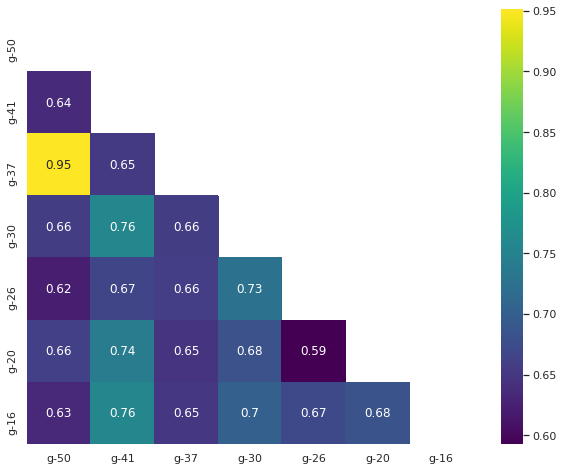

In [ ]:
# cmap => define a cor do mapa
mask = np.zeros_like(correlac)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(correlac, mask=mask, annot=True, cmap = 'viridis')

#####Desafio 02: Normalizar o crosstab pela coluna

In [ ]:
# Normalização feita em aula, o somatório dos valores de todas as células é = 1
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'],  normalize = True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [ ]:
# o somatório de cada coluna deve ser = 1
norm_column = pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')
norm_column

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [ ]:
norm_column['com_controle'].agg('sum')

1.0

In [ ]:
norm_column['com_droga'].agg('sum')

0.9999999999999999

#####Desafio 03: Explorar outros agregadores

[Agregadores - Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html?highlight=aggregation)

[Groupby - Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)



*   .agg()
*   .groupby()


In [ ]:
# agg 'sum'
norm_column.agg(['sum'])

,com_controle,com_droga
sum,1.0,1.0


In [ ]:
# agg 'sum' e 'mean'/ soma e média
norm_column.agg(["sum", "mean"])

,com_controle,com_droga
sum,1.000000,1.000000
mean,0.166667,0.166667


##### Desafio 04: Explorar o Melt

[Melt - Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt)

In [ ]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'}, # preenche a coluna A, posição primeira linha '0' recebe a...
                   'B': {0: 1, 1: 3, 2: 5}, # preenche a coluna B
                   'C': {0: 2, 1: 4, 2: 6}}) # preenche a coluna C
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [ ]:
df.melt(id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


##### Desafio 05: Calcular e analizar a correlação entre gs e cs. Refletir sobre os efeitos biológicos destas correlações.

In [ ]:
corr_cels_gene = dados.loc[:, 'g-721' : 'c-50'].corr()
corr_cels_gene

,g-721,g-722,g-723,g-724,g-725,g-726,g-727,g-728,g-729,g-730,g-731,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,...,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
g-721,1.000000,0.050470,0.559375,0.469471,0.254108,-0.469327,-0.166648,0.487719,0.235079,-0.063888,0.618222,0.348096,-0.444935,0.076683,0.065656,-0.139783,-0.043193,-0.297007,-0.309548,0.014935,-0.060666,-0.387237,-0.402690,0.656256,0.367949,0.357948,0.092340,0.257032,-0.314221,0.499711,0.023510,0.338827,0.011147,0.292088,-0.176608,-0.071300,0.116195,0.302139,-0.100211,-0.606171,...,-0.634578,-0.614648,-0.637709,-0.612624,-0.611125,-0.556952,-0.625189,-0.617652,-0.585376,-0.626299,-0.628110,-0.548723,-0.626349,-0.621540,-0.617393,-0.639689,-0.622971,-0.630817,-0.580348,-0.622495,-0.629323,-0.591249,-0.634413,-0.610896,-0.597934,-0.620897,-0.535498,-0.638842,-0.610489,-0.639628,-0.622162,-0.644249,-0.632064,-0.622877,-0.626621,-0.604530,-0.626361,-0.619314,-0.619691,-0.616622
g-722,0.050470,1.000000,-0.000417,-0.082057,0.006895,-0.009804,0.006818,0.045799,0.019075,-0.076691,0.019792,-0.008001,0.036964,0.116731,-0.010311,0.070482,-0.001695,0.072665,-0.040730,0.016667,-0.027114,-0.009701,0.049422,0.031063,0.065022,0.032316,0.008853,-0.015252,-0.022433,-0.036418,-0.108323,-0.098592,0.221198,0.019169,-0.047668,-0.007110,0.183444,-0.027437,0.088536,-0.022253,...,0.010801,0.032027,0.031993,0.018671,0.051201,0.033890,0.020290,0.018324,0.048097,0.026897,0.032531,0.033904,0.048611,0.013917,0.058089,0.008089,0.034300,-0.011990,0.035484,0.027608,0.011212,0.049655,0.015939,0.053343,0.028805,0.022370,0.051420,-0.005074,0.041527,0.004595,0.020794,0.026230,0.017322,0.036506,0.029052,0.053534,0.013443,0.007196,0.021279,0.037223
g-723,0.559375,-0.000417,1.000000,0.582671,0.267612,-0.507914,-0.346862,0.527678,0.264996,-0.109997,0.747392,0.398422,-0.540770,0.182479,0.027450,-0.180969,-0.038211,-0.322929,-0.302863,0.055366,-0.100836,-0.411077,-0.414195,0.691878,0.534596,0.357572,0.029487,0.270095,-0.302891,0.618281,0.128624,0.422307,0.041207,0.256760,-0.192613,-0.169063,0.139703,0.224045,-0.152032,-0.691401,...,-0.714744,-0.694326,-0.724708,-0.688897,-0.699688,-0.625252,-0.713964,-0.727673,-0.692925,-0.698922,-0.717005,-0.638487,-0.674730,-0.718342,-0.702990,-0.724145,-0.706580,-0.733541,-0.645958,-0.703429,-0.713315,-0.664736,-0.711760,-0.704007,-0.663494,-0.697604,-0.602831,-0.725187,-0.699304,-0.712807,-0.711663,-0.733378,-0.692564,-0.701120,-0.715240,-0.675108,-0.735315,-0.710750,-0.718372,-0.713916
g-724,0.469471,-0.082057,0.582671,1.000000,0.245072,-0.406498,-0.254751,0.506854,0.139983,-0.172668,0.610892,0.371721,-0.449901,0.241939,-0.047100,-0.072340,-0.014613,-0.360780,-0.243422,0.018187,-0.013194,-0.373876,-0.478029,0.651321,0.393977,0.263842,0.130827,0.208375,-0.224983,0.577324,-0.045148,0.428796,0.042382,0.224662,-0.130041,-0.109310,0.164806,0.006339,-0.163849,-0.565618,...,-0.612002,-0.600219,-0.625668,-0.562059,-0.604702,-0.528479,-0.610188,-0.616689,-0.593732,-0.613303,-0.608202,-0.536189,-0.545822,-0.594841,-0.614609,-0.623576,-0.609385,-0.602090,-0.543819,-0.593451,-0.586414,-0.543262,-0.601589,-0.620587,-0.573607,-0.603675,-0.472250,-0.609849,-0.602793,-0.585442,-0.602559,-0.629679,-0.595475,-0.606977,-0.613394,-0.587867,-0.633048,-0.632550,-0.595013,-0.601973
g-725,0.254108,0.006895,0.267612,0.245072,1.000000,-0.343145,-0.079055,0.275354,0.117498,-0.044718,0.297984,0.211751,-0.257640,0.103738,0.092213,-0.212479,-0.058664,-0.148616,-0.177221,-0.124199,-0.098566,-0.300620,-0.222961,0.371507,0.205839,0.149439,0.001814,0.150418,-0.123525,0.264158,-0.066678,0.214798,-0.066545,0.108744,-0.044264,-0.115341,0.121086,0.128469,-0.110015,-0.323442,...,-0.351609,-0.351477,-0.344804,-0.314611,-0.357902,-0.

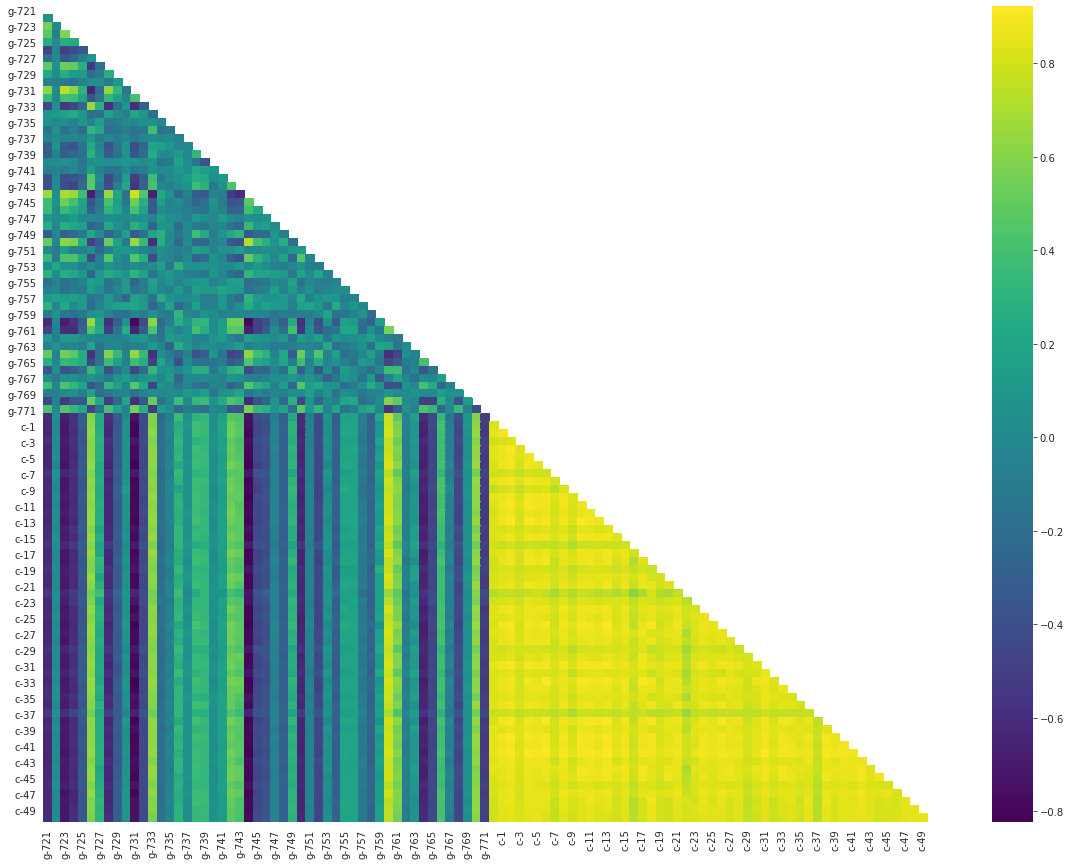

In [ ]:
# cmap => define a cor do mapa
corr_cels_gene = dados.loc[:, 'g-721' : 'c-50'].corr()
mask = np.zeros_like(corr_cels_gene)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize=(20,15))
  ax = sns.heatmap(corr_cels_gene, mask=mask,  cmap = 'viridis')

##### Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

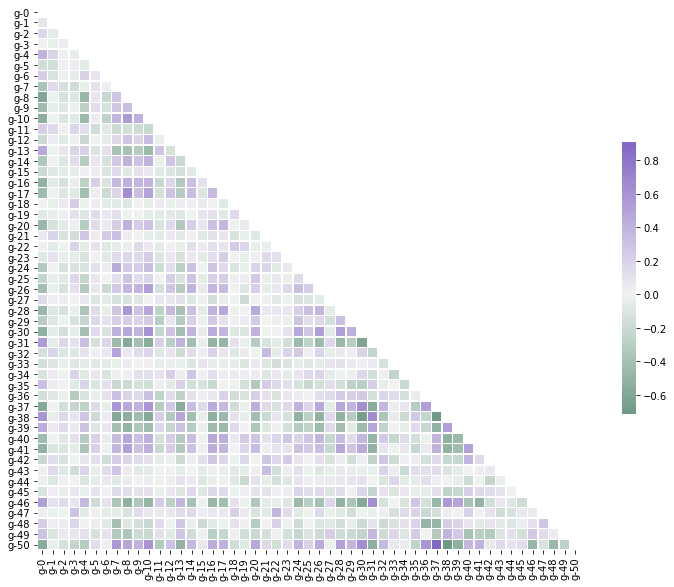

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcule a matriz de correlação
corr = dados.loc[:, 'g-0':'g-50'].corr()

# Gere uma máscara para o triângulo superior, assim as informações não aparecerão de forma duplicada
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a figura matplotlib
f, ax = plt.subplots(figsize=(15, 10))

# Gerar um mapa de cores divergentes personalizado, dentro dos parênteses adicionar as cores que deseja plotar no gráfico
cmap = sns.diverging_palette(150, 275,s=60, as_cmap=True)

# Desenhe o mapa de calor com a máscara e a proporção correta, aqui eu acho as variáveis e add mais alguns detalhes
# há linhas entre os quadradinhos das correlações com largura .5, 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Desafio 07: Resumir o que você aprendeu com os dados.


* crosstab
* o que são dados categóricos
* lmplot
* melt
* groupby()
* agg()
* matriz de correlação - heatmap
* Variância, como os valores obtidos com o experimento se distribuem ao 
redor da média 